In [3]:
import datetime

import matplotlib as mat

import matplotlib.pyplot as plt
import matplotlib.colors as mpl_colors
import matplotlib.colorbar as mpl_colorbar

import netCDF4 as nc
import numpy as np
from salishsea_tools import geo_tools

import shutil

from salishsea_tools import viz_tools

#get_ipython().magic('matplotlib inline')

%matplotlib inline


 
#step = input("Time step in minutes(ex:30): ")

#step = int(step)

# In[4]:

#End of spit
late = 49.205
lone = -123.26
#Further up spit
lats = 49.214
lons = -123.22

deep = 110
shallow = 35




# In[9]:

bathy = nc.Dataset("/home/gsgarbi/analysis-giorgio/sequential/bathy_meter_SalishSea2.nc")
model_lats = bathy.variables['nav_lat'][:]
model_lons = bathy.variables['nav_lon'][:]
depth = bathy.variables['Bathymetry'][:]


# In[ ]:

dx = 1.2
lat = late + dx * (late - lats)
lon = lone + dx * (lone - lons)
y, x = geo_tools.find_closest_model_point(lon, lat, model_lons, model_lats)
#print(depth[y, x])
#print(y, x)
#print('And in Fortran for ariane', y + 1, x + 1)
# point I used
outy = y - 1
outx = x - 1

In [11]:
edit = ("jul19",)

COL = 2

LIN = len(edit) // 2 + len(edit) % 2

print (LIN, COL)

trajectories = []

    
trajectories1 =[]
for day in edit:
    traj = np.loadtxt("/home/gsgarbi/analysis-giorgio/project2/part2/%s/traj.txt"%day, delimiter = ' ')
    trajectories1.append(traj)

l = 0
c= COL
for lin in range(LIN):
    line = trajectories1[l:c]
    trajectories.append(line)
    l += 2
    c += 2


print (len(trajectories))

PARTICLES = range(1,25)

1 1
1


In [8]:
original_limx = (-123.5, -123.1)

original_ticksx = (-123.5, -123.3, -123.1)

original_limy = (49.05, 49.35)

original_ticksy = (49.1, 49.2, 49.3)

new_limx = (-124.5,-122.5)

new_ticksx = (new_limx[0], float(sum(new_limx))/2, new_limx[1])

new_limy = (48.7,49.5)

new_ticksy = (new_limy[0], float(sum(new_limy))/2, new_limy[1])







TypeError: 'AxesSubplot' object is not subscriptable

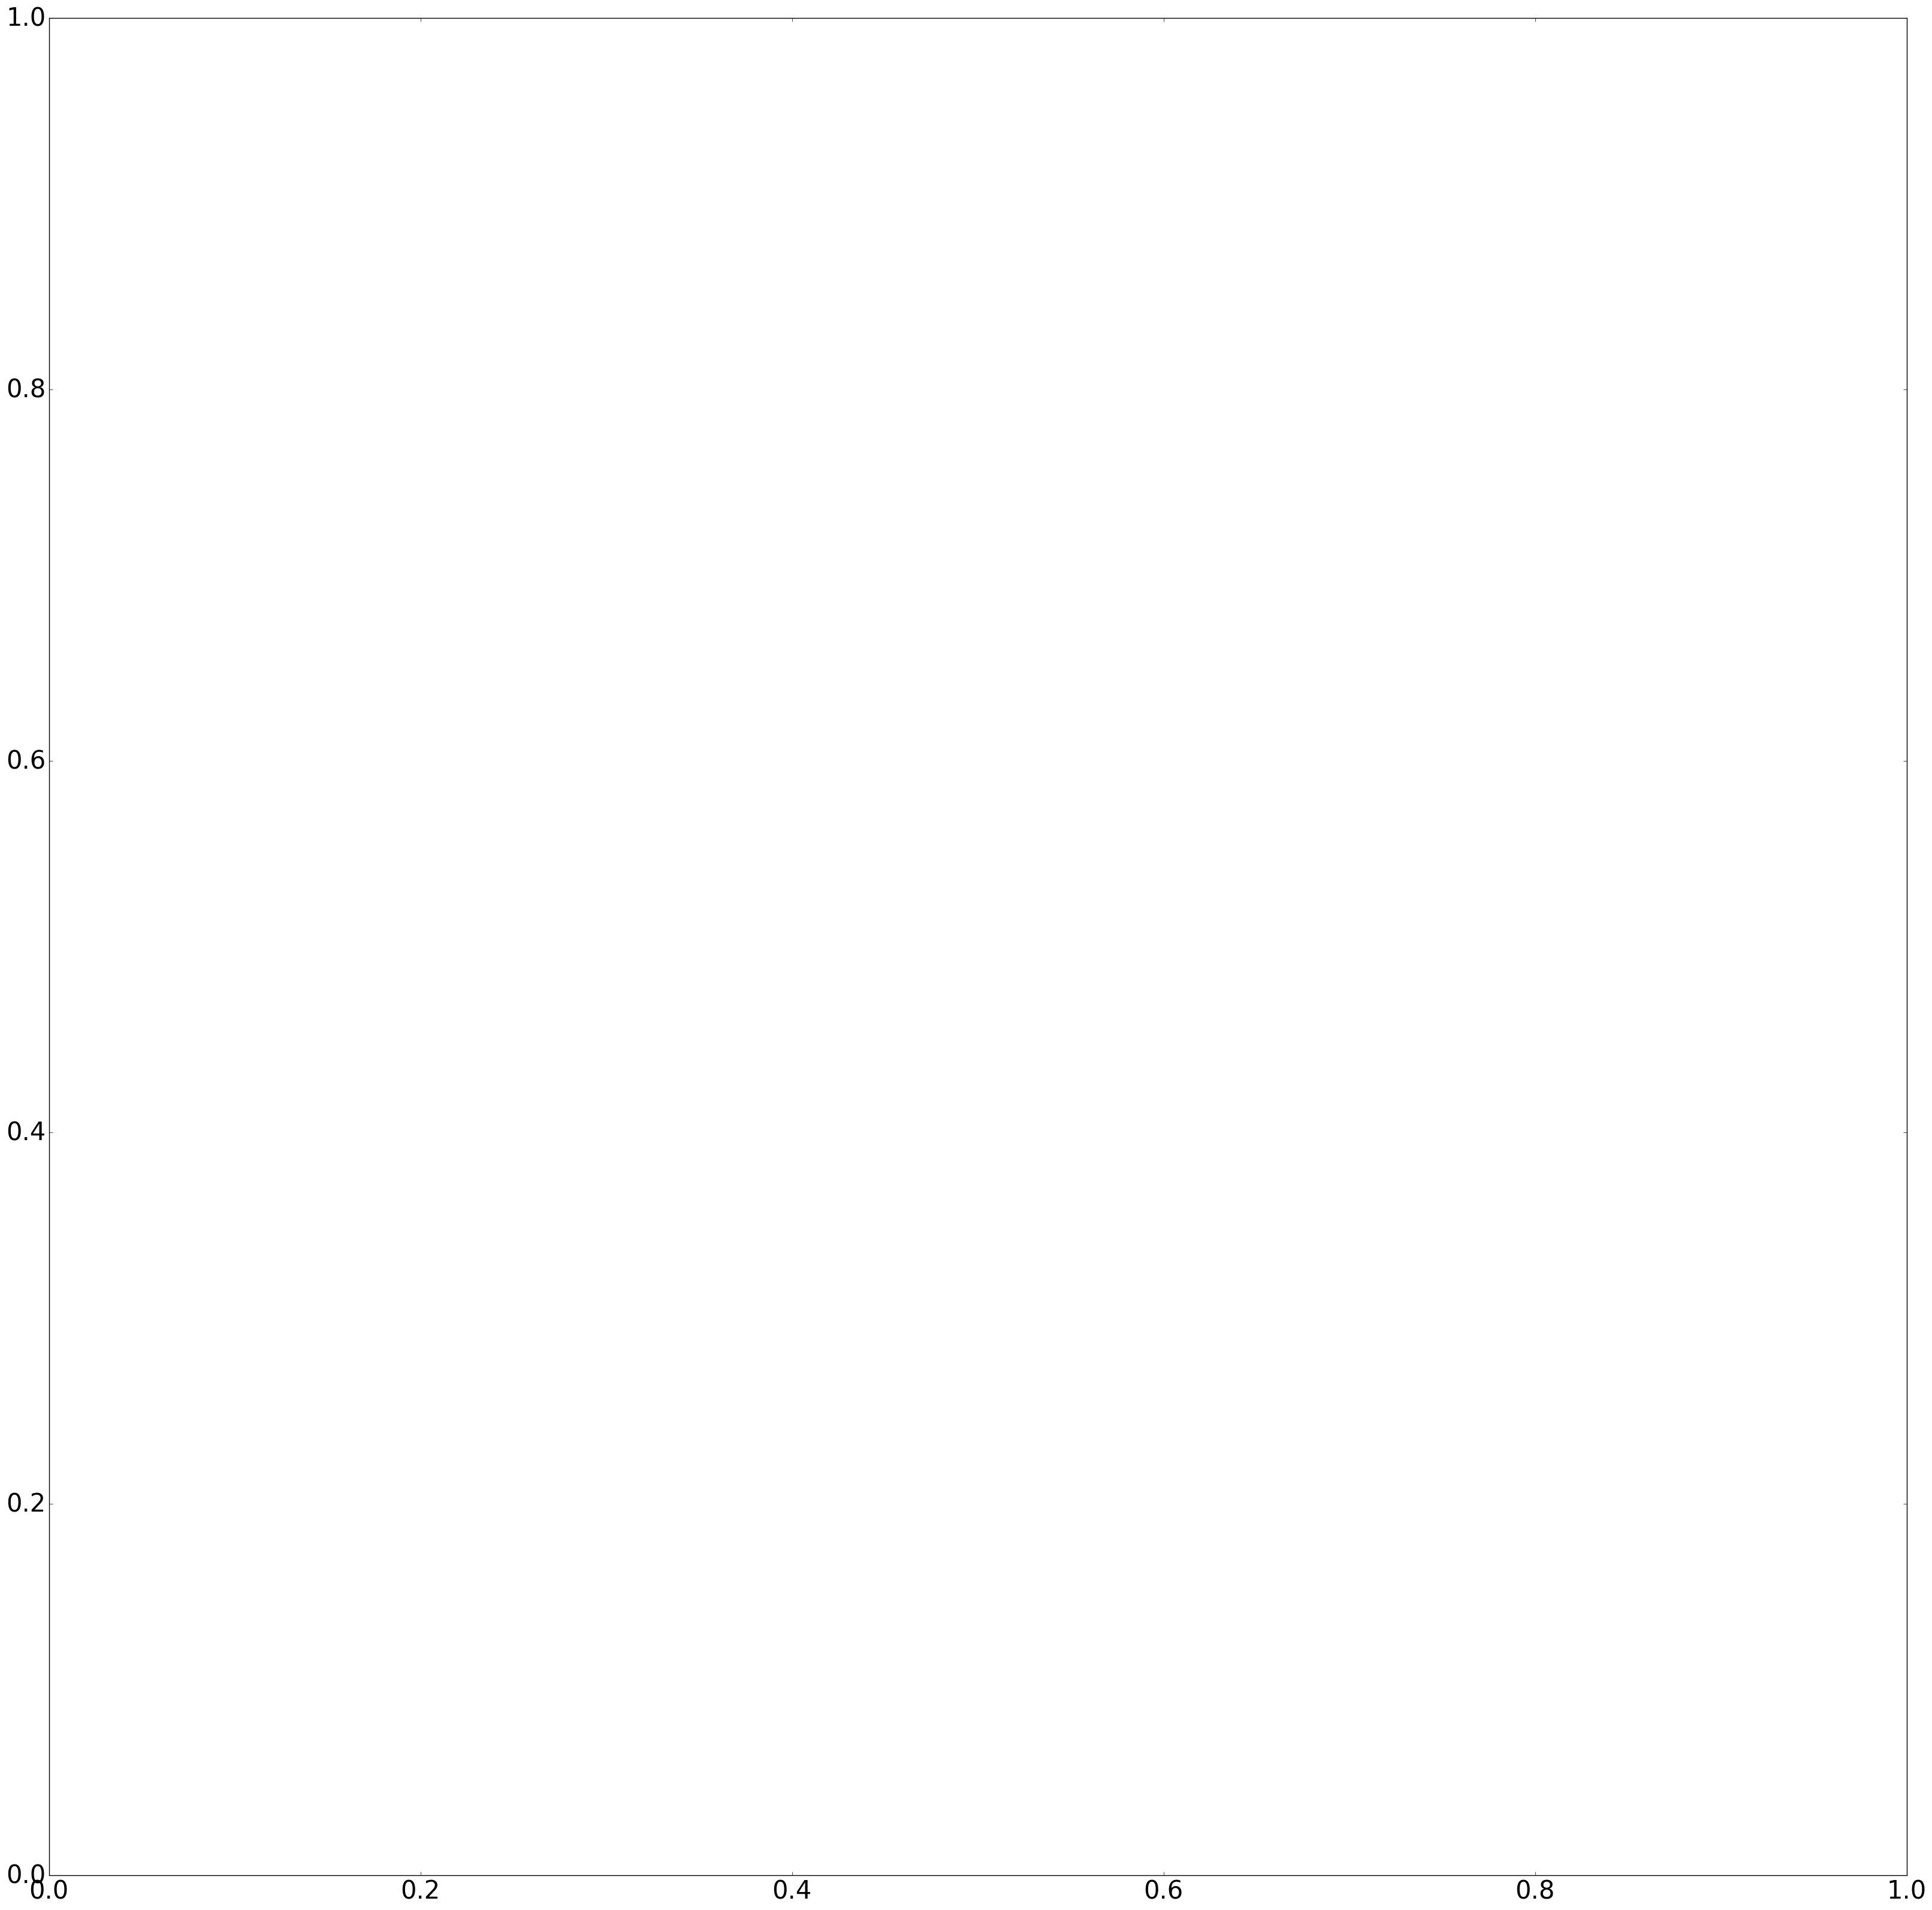

In [12]:
mat.rcParams.update({'font.size': 30})

fig, axs = plt.subplots(LIN,COL,figsize=(40,40))

for j in range(LIN):
    for k in range (COL):
#Ive chosen my run
        #if 2*j + k + 1 > len(edit):
            #print ("end")
            #continue
        
        axs[j,k].set_title("""INITIAL DATE: %s INITIAL TIMES: 1AM to 12AM
RUN LENGHT: 2 weeks INITIAL DEPTHS(m): 45, 59, 77"""% edit[2*j+k] , fontsize = 32)

        
        mesh = axs[j,k].pcolormesh(model_lons, model_lats, depth, cmap='winter_r')
        cb = fig.colorbar(mesh, ax=axs[j,k])
        cmap = plt.cm.plasma_r
        
        norm = mpl_colors.Normalize(vmin=deep, vmax=shallow)

        

        axs[j,k].set_xlim(new_limx)
        axs[j,k].set_xticks(new_ticksx)
        axs[j,k].set_xticklabels(('%s W' %-new_limx[0], '%s W' %round(float(sum(new_limx))/2,2), '%s W' %-new_limx[1]))
        axs[j,k].set_xlabel('Longitude')
        axs[j,k].set_ylim(new_limy)
        axs[j,k].set_yticks(new_ticksy)
        axs[j,k].set_yticklabels(('%s N' %new_limy[0], '%s N' %round(float(sum(new_limy))/2,1), '%s N' %new_limy[1]))
        axs[j,k].set_ylabel('Latitude')
        
        axs[j,k].plot(model_lons[outy, outx], model_lats[outy, outx], 'wo')
        
        #viz_tools.set_aspect(axs[j,k])
        
        if j >= len(trajectories) or k >= len(trajectories[j]):
            break
        else:
            for i in range(len(trajectories[j][k])):
                if trajectories[j][k][i][0] in PARTICLES:
                    scaled_z = 1-(deep + trajectories[j][k][i][3]) / (deep - shallow)
                    cmap = plt.cm.plasma_r
                    color = cmap(scaled_z)
                    axs[j,k].scatter(trajectories[j][k][i][1] , trajectories[j][k][i][2] , c=color, edgecolor = "none")

plt.tight_layout()